<a href="https://colab.research.google.com/github/shyamjith94/PyTorch/blob/main/SimpleLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
%%capture
!pip install torch torchvision

In [96]:
import torch, torchvision
import numpy as np
import matplotlib.pyplot as plt

import torch.nn as nn

In [113]:
x = torch.linspace(1, 50, 50)
x

tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
        15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28.,
        29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42.,
        43., 44., 45., 46., 47., 48., 49., 50.])

In [98]:
x = x.reshape(-1, 1)
print(x[:10])

tensor([[ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.]])


In [99]:
torch.manual_seed(71)
error = torch.randint(-8, 9, (50,1), dtype=torch.float)
print(error[:10])

tensor([[ 2.],
        [ 7.],
        [ 2.],
        [ 6.],
        [ 2.],
        [-4.],
        [ 2.],
        [-5.],
        [ 4.],
        [ 1.]])


In [100]:
# y = mx+b
# 2 - slope
# 1 - intercept
y = 2*x+1+error
print(y[:10])

tensor([[ 5.],
        [12.],
        [ 9.],
        [15.],
        [13.],
        [ 9.],
        [17.],
        [12.],
        [23.],
        [22.]])


In [101]:
y.shape

torch.Size([50, 1])

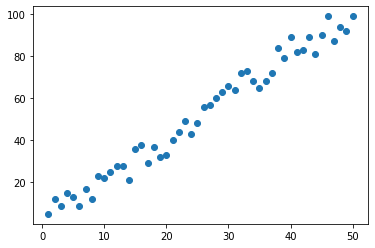

In [102]:
plt.scatter(x, y)

In [103]:
torch.manual_seed(59)
model = nn.Linear(in_features=1, out_features=1)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


**Model Class**

In [104]:
class Model(nn.Module):
    def __init__(self, in_feature, out_feature):
        super().__init__()
        self.linear = nn.Linear(in_features=in_feature, out_features=out_feature)

    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

In [105]:
torch.manual_seed(59)
model = Model(1,1)
print(model.linear.weight)
print(model.linear.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


In [106]:
for name,param in model.named_parameters():
    print(name,"\t", param.item())

linear.weight 	 0.10597813129425049
linear.bias 	 0.9637961387634277


In [121]:
x_t = torch.tensor([2.0])
print(model.forward(x_t))

tensor([1.1758], grad_fn=<AddBackward0>)


In [108]:
x1 = np.linspace(0.0, 50.0, 50)
x1

array([ 0.        ,  1.02040816,  2.04081633,  3.06122449,  4.08163265,
        5.10204082,  6.12244898,  7.14285714,  8.16326531,  9.18367347,
       10.20408163, 11.2244898 , 12.24489796, 13.26530612, 14.28571429,
       15.30612245, 16.32653061, 17.34693878, 18.36734694, 19.3877551 ,
       20.40816327, 21.42857143, 22.44897959, 23.46938776, 24.48979592,
       25.51020408, 26.53061224, 27.55102041, 28.57142857, 29.59183673,
       30.6122449 , 31.63265306, 32.65306122, 33.67346939, 34.69387755,
       35.71428571, 36.73469388, 37.75510204, 38.7755102 , 39.79591837,
       40.81632653, 41.83673469, 42.85714286, 43.87755102, 44.89795918,
       45.91836735, 46.93877551, 47.95918367, 48.97959184, 50.        ])

In [109]:
w1 = 0.1059
b1 = 0.9637
y1 = w1*x1+b1
y1

array([0.9637    , 1.07176122, 1.17982245, 1.28788367, 1.3959449 ,
       1.50400612, 1.61206735, 1.72012857, 1.8281898 , 1.93625102,
       2.04431224, 2.15237347, 2.26043469, 2.36849592, 2.47655714,
       2.58461837, 2.69267959, 2.80074082, 2.90880204, 3.01686327,
       3.12492449, 3.23298571, 3.34104694, 3.44910816, 3.55716939,
       3.66523061, 3.77329184, 3.88135306, 3.98941429, 4.09747551,
       4.20553673, 4.31359796, 4.42165918, 4.52972041, 4.63778163,
       4.74584286, 4.85390408, 4.96196531, 5.07002653, 5.17808776,
       5.28614898, 5.3942102 , 5.50227143, 5.61033265, 5.71839388,
       5.8264551 , 5.93451633, 6.04257755, 6.15063878, 6.2587    ])

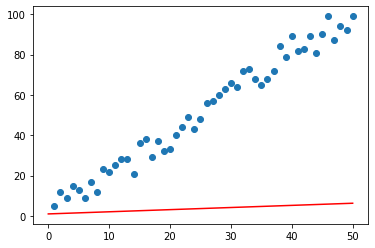

In [122]:
plt.scatter(x, y)
plt.plot(x1,y1, 'r')


In [116]:
criterion = nn.MSELoss()


In [117]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [118]:
epochs = 50

In [128]:
losses = []

for i in range(epochs):
    i = i+1
    y_pred = model.forward(x.reshape(-1,1))
    loss = criterion(y_pred, y)
    losses.append(loss)
    print(f"epochs\t{epochs}, loss \t{loss.item()}, weight\t{model.linear.weight.item()}, bias\t{model.linear.bias.item()}")
    # update hyper prams
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epochs	50, loss 	172703.453125, weight	15.933629989624023, bias	8.877622604370117
epochs	50, loss 	89174.6484375, weight	-8.417130470275879, bias	8.151251792907715
epochs	50, loss 	46051.75390625, weight	9.079411506652832, bias	8.66822338104248
epochs	50, loss 	23788.9140625, weight	-3.4919776916503906, bias	8.291836738586426
epochs	50, loss 	12295.4091796875, weight	5.540905475616455, bias	8.557343482971191
epochs	50, loss 	6361.71240234375, weight	-0.949213981628418, bias	8.361642837524414
epochs	50, loss 	3298.3525390625, weight	3.7141826152801514, bias	8.497329711914062
epochs	50, loss 	1716.8460693359375, weight	0.3636070191860199, bias	8.394911766052246
epochs	50, loss 	900.3663940429688, weight	2.771193265914917, bias	8.463578224182129
epochs	50, loss 	478.8432922363281, weight	1.0414518117904663, bias	8.409319877624512
epochs	50, loss 	261.2218322753906, weight	2.2844436168670654, bias	8.443387031555176
epochs	50, loss 	148.8677978515625, weight	1.3914811611175537, bias	8.41399

Text(0.5, 0, 'epochs')

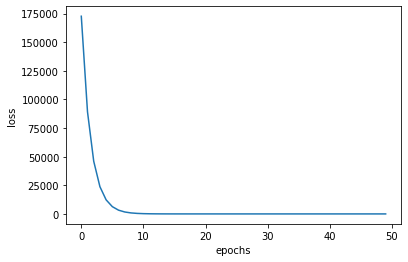

In [130]:
plt.plot(range(epochs), losses)
plt.ylabel("loss")
plt.xlabel("epochs")

In [131]:
x_p = np.linspace(0.0, 50.0, 50)
curr_weight = model.linear.weight.item()
curr_bias = model.linear.bias.item()
predicted_y = curr_weight*x_p + curr_bias

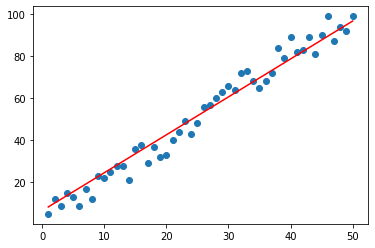

In [132]:
plt.scatter(x, y)
plt.plot(x, predicted_y, 'r')